## **H20**

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

In [2]:
! pip install h2o

  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=8309ec942e10dfa252ebf245369e1177f43a257b902f0f29b2a9bb359e4ee8f7
  Stored in directory: c:\users\juanl\appdata\local\pip\cache\wheels\e6\0d\48\064de7f50a0e16e6a10c5b22a8e8fd3ef371a84b146b6e5a3e
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=df6a92a4a7e53290f958302f53e2052c5fe86fb2a8fb0d7f889d5f8ef6c85453
  Stored in directory: c:\users\juanl\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built h2o future


In [3]:
import h2o
from h2o.automl import H2OAutoML

In [4]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)
  Starting server from C:\Users\juanl\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\juanl\AppData\Local\Temp\tmpq1o10cfo
  JVM stdout: C:\Users\juanl\AppData\Local\Temp\tmpq1o10cfo\h2o_juanl_started_from_python.out
  JVM stderr: C:\Users\juanl\AppData\Local\Temp\tmpq1o10cfo\h2o_juanl_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_juanl_r8xuk3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.762 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [7]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
train.head()


response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
1,0.869293,-0.635082,0.22569,0.32747,-0.689993,0.754202,-0.248573,-1.09206,0,1.37499,-0.653674,0.930349,1.10744,1.1389,-1.5782,-1.04699,0,0.65793,-0.0104546,-0.0457672,3.10196,1.35376,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.49797,-0.31301,1.09553,-0.557525,-1.58823,2.17308,0.812581,-0.213642,1.27101,2.21487,0.499994,-1.26143,0.732156,0,0.398701,-1.13893,-0.00081911,0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.47064,-1.63597,0.453773,0.425629,1.10487,1.28232,1.38166,0,0.851737,1.54066,-0.81969,2.21487,0.99349,0.35608,-0.208778,2.54822,1.25695,1.12885,0.900461,0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
0,1.34438,-0.876626,0.935913,1.99205,0.882454,1.78607,-1.64678,-0.942383,0,2.42326,-0.676016,0.736159,2.21487,1.29872,-1.43074,-0.364658,0,0.745313,-0.678379,-1.36036,0,0.946652,1.0287,0.998656,0.728281,0.8692,1.02674,0.957904
1,1.10501,0.321356,1.5224,0.882808,-1.20535,0.681466,-1.07046,-0.921871,0,0.800872,1.02097,0.971407,2.21487,0.596761,-0.350273,0.631194,0,0.479999,-0.373566,0.113041,0,0.755856,1.36106,0.98661,0.838085,1.1333,0.872245,0.808487
0,1.59584,-0.607811,0.00707492,1.81845,-0.111906,0.84755,-0.566437,1.58124,2.17308,0.755421,0.64311,1.42637,0,0.921661,-1.19043,-1.61559,0,0.651114,-0.654227,-1.27434,3.10196,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
1,0.409391,-1.88468,-1.02729,1.67245,-1.6046,1.33801,0.0554274,0.0134659,2.17308,0.509783,-1.03834,0.707862,0,0.746918,-0.358465,-1.64665,0,0.367058,0.0694965,1.37713,3.10196,0.869418,1.22208,1.00063,0.545045,0.698653,0.977314,0.828786
1,0.933895,0.62913,0.527535,0.238033,-0.966569,0.547811,-0.0594392,-1.70687,2.17308,0.941003,-2.65373,-0.15722,0,1.03037,-0.175505,0.523021,2.54822,1.37355,1.29125,-1.46745,0,0.901837,1.08367,0.979696,0.7833,0.849195,0.894356,0.774879
1,1.40514,0.536603,0.689554,1.17957,-0.110061,3.2024,-1.52696,-1.57603,0,2.93154,0.567342,-0.130033,2.21487,1.78712,0.899499,0.585151,2.54822,0.401865,-0.151202,1.16349,0,1.66707,4.03927,1.17583,1.04535,1.54297,3.53483,2.74075
1,1.17657,0.104161,1.397,0.479721,0.265513,1.13556,1.53483,-0.253291,0,1.02725,0.534316,1.18002,0,2.40566,0.0875568,-0.976534,2.54822,1.25038,0.268541,0.530334,0,0.833175,0.773968,0.98575,1.1037,0.84914,0.937104,0.812364


In [9]:
test.head()

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


In [10]:
# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

In [11]:
print(x)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28']


In [12]:
print(y)

response


In [13]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
20:28:48.595: AutoML: XGBoost is not available; skipping it.

█████████████████████████████

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210111_151522,0.788684,0.552554,0.806082,0.317665,0.432705,0.187234
StackedEnsemble_BestOfFamily_AutoML_20210111_151522,0.78752,0.553539,0.804342,0.307165,0.433161,0.187628
GBM_5_AutoML_20210111_151522,0.78219,0.558353,0.801738,0.319658,0.435512,0.18967
GBM_2_AutoML_20210111_151522,0.777673,0.562514,0.796364,0.334056,0.437583,0.191479
GBM_1_AutoML_20210111_151522,0.777294,0.562744,0.799184,0.356261,0.437727,0.191605
GBM_3_AutoML_20210111_151522,0.775488,0.564794,0.794892,0.327971,0.438722,0.192477
GBM_grid__1_AutoML_20210111_151522_model_1,0.772926,0.568181,0.791195,0.322808,0.439997,0.193598
GBM_4_AutoML_20210111_151522,0.77248,0.569483,0.792582,0.336913,0.440873,0.194369
XGBoost_grid__1_AutoML_20210111_151522_model_3,0.771423,0.569176,0.789127,0.337386,0.440901,0.194394
GBM_grid__1_AutoML_20210111_151522_model_2,0.77049,0.569351,0.788633,0.369523,0.440822,0.194324


In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `"H2OAutoML"` object or on the leader model
# object directly
preds = aml.predict(test)


stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20210111_151522,0.788684,0.552554,0.806082,0.317665,0.432705,0.187234,2888,0.130426
StackedEnsemble_BestOfFamily_AutoML_20210111_151522,0.78752,0.553539,0.804342,0.307165,0.433161,0.187628,1372,0.075349
GBM_5_AutoML_20210111_151522,0.78219,0.558353,0.801738,0.319658,0.435512,0.18967,2393,0.013926
GBM_2_AutoML_20210111_151522,0.777673,0.562514,0.796364,0.334056,0.437583,0.191479,1648,0.012215
GBM_1_AutoML_20210111_151522,0.777294,0.562744,0.799184,0.356261,0.437727,0.191605,2031,0.011231
GBM_3_AutoML_20210111_151522,0.775488,0.564794,0.794892,0.327971,0.438722,0.192477,2002,0.011965
GBM_grid__1_AutoML_20210111_151522_model_1,0.772926,0.568181,0.791195,0.322808,0.439997,0.193598,1150,0.013034
GBM_4_AutoML_20210111_151522,0.77248,0.569483,0.792582,0.336913,0.440873,0.194369,2011,0.013205
XGBoost_grid__1_AutoML_20210111_151522_model_3,0.771423,0.569176,0.789127,0.337386,0.440901,0.194394,1032,0.00441
GBM_grid__1_AutoML_20210111_151522_model_2,0.77049,0.569351,0.788633,0.369523,0.440822,0.194324,2238,0.016914


In [ ]:
preds.head()

predict,p0,p1
0,0.721581,0.278419
0,0.695078,0.304922
1,0.535092,0.464908
1,0.328137,0.671863
0,0.685939,0.314061
1,0.196132,0.803868
1,0.248137,0.751863
1,0.600732,0.399268
1,0.490846,0.509154
0,0.840339,0.159661


In [ ]:
import h2o
from h2o.automl import H2OAutoML


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,27 mins 28 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_5gr8pa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.080 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import wine quality dataset
f = "https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv"
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
df.head()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,white
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,white
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,white
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,white
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6,white
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,white
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,white
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6,white


In [ ]:
df.shape

(6497, 13)

In [ ]:
# Reponse column
y = "quality"

In [ ]:
# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [ ]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


**H2O Explainability Interface** is a convenient wrapper to a number of explainabilty methods and visualizations in H2O. The main functions, h2o.explain() (global explanation) and h2o.explain_row() (local explanation) work for individual H2O models, as well a list of models or an H2O AutoML object. The h2o.explain() function generates a list of explanations – individual units of explanation such as a Partial Dependence plot or a Variable Importance plot. Most of the explanations are visual – these plots can also be created by individual utility functions outside the h2o.explain() function.

**SHAP values**

You've seen (and used) techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this?

A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions
You'll use SHAP Values to explain individual predictions in this lesson. In the next lesson, you'll see how these can be aggregated into powerful model-level insights.



# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20210309_185438,0.392872,0.626795,0.392872,0.457025,0.094726,409,0.030985
StackedEnsemble_BestOfFamily_AutoML_20210309_185438,0.393123,0.626995,0.393123,0.45704,0.0947668,326,0.020339
GBM_grid__1_AutoML_20210309_185438_model_2,0.430081,0.655805,0.430081,0.503916,0.0988142,642,0.011912
XGBoost_grid__1_AutoML_20210309_185438_model_1,0.445,0.667083,0.445,0.457581,0.100736,575,0.004277
XGBoost_2_AutoML_20210309_185438,0.457409,0.676321,0.457409,0.506412,0.101782,343,0.002299
XGBoost_3_AutoML_20210309_185438,0.459998,0.678231,0.459998,0.522742,0.101898,391,0.001622
XRT_1_AutoML_20210309_185438,0.464125,0.681267,0.464125,0.486658,0.102704,240,0.003885
GBM_4_AutoML_20210309_185438,0.466683,0.683142,0.466683,0.534073,0.102883,258,0.004518
XGBoost_grid__1_AutoML_20210309_185438_model_2,0.46942,0.685143,0.46942,0.486807,0.103236,1875,0.003634
GBM_2_AutoML_20210309_185438,0.470005,0.685569,0.470005,0.538108,0.103081,242,0.003465


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

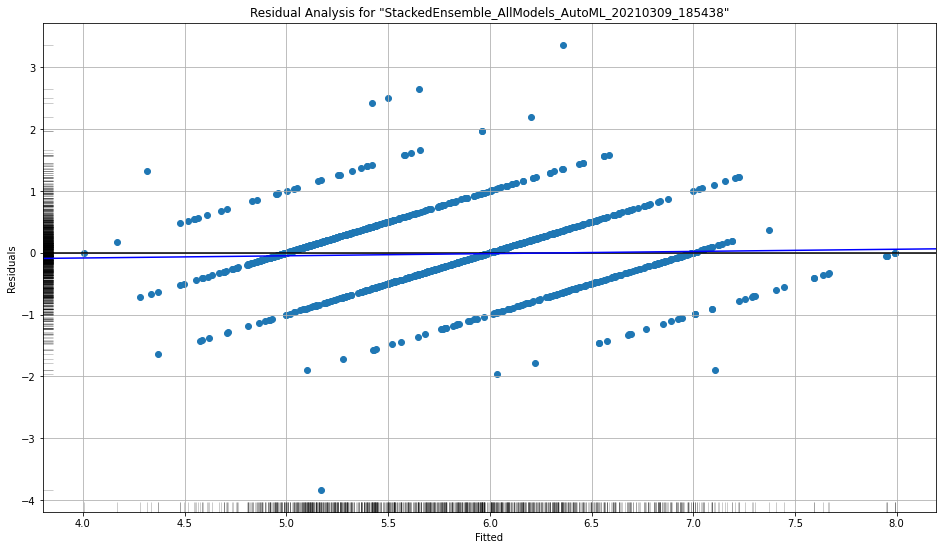

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

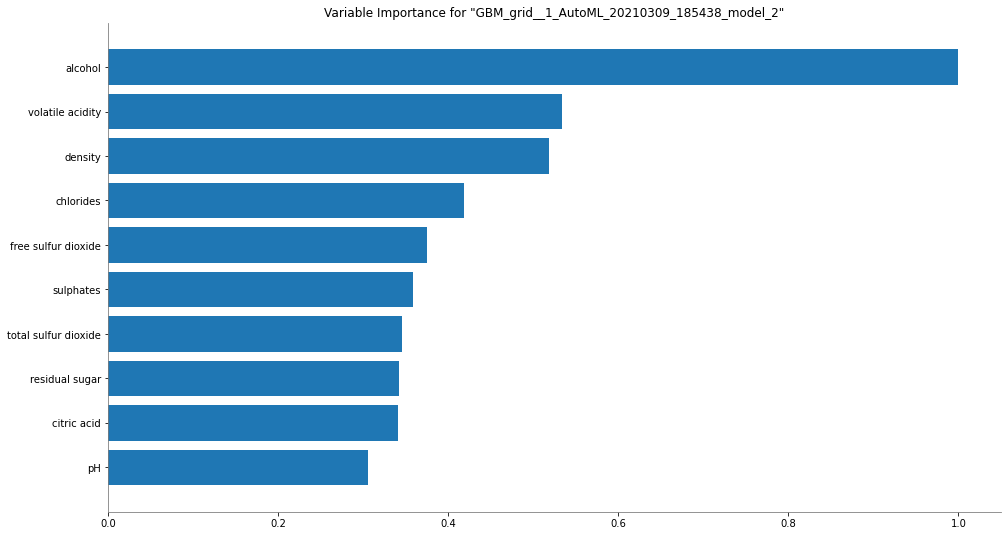

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

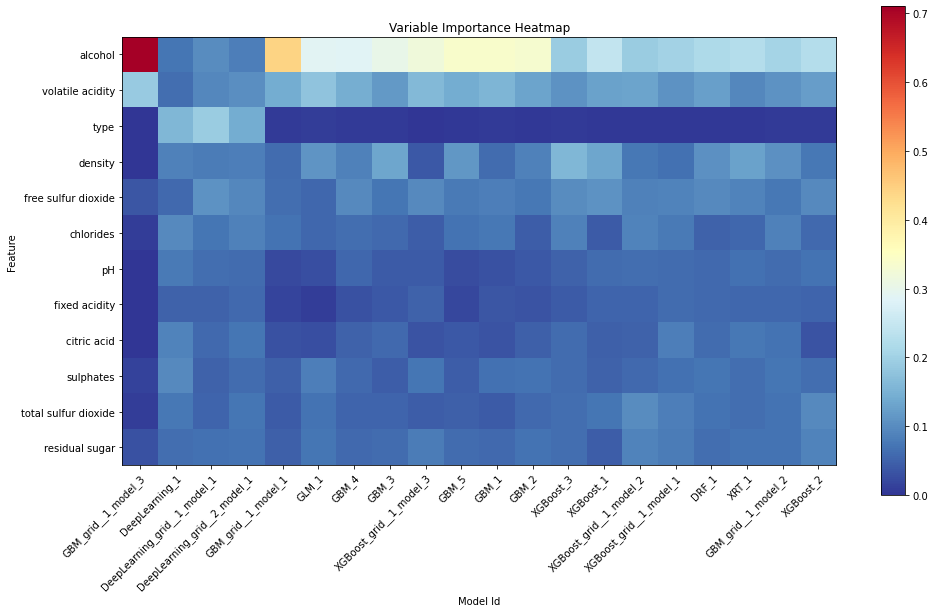

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

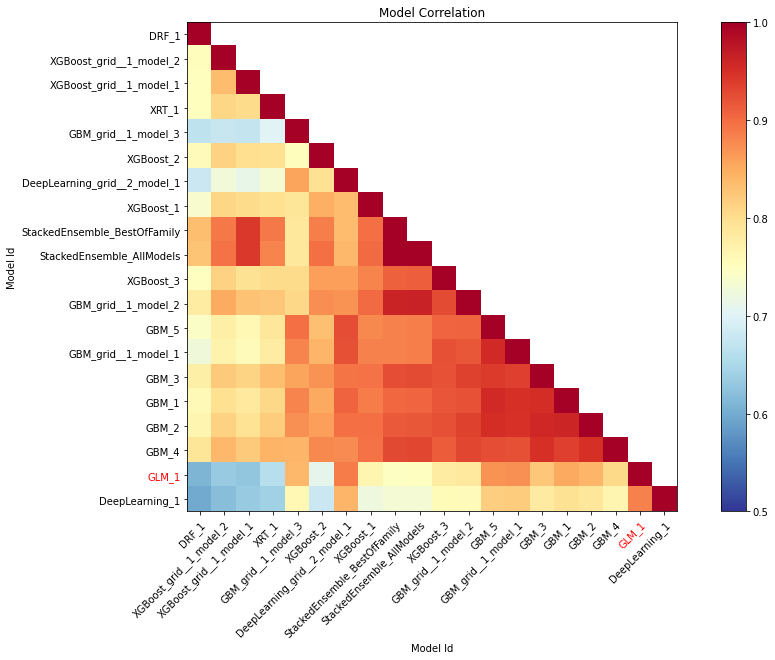

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

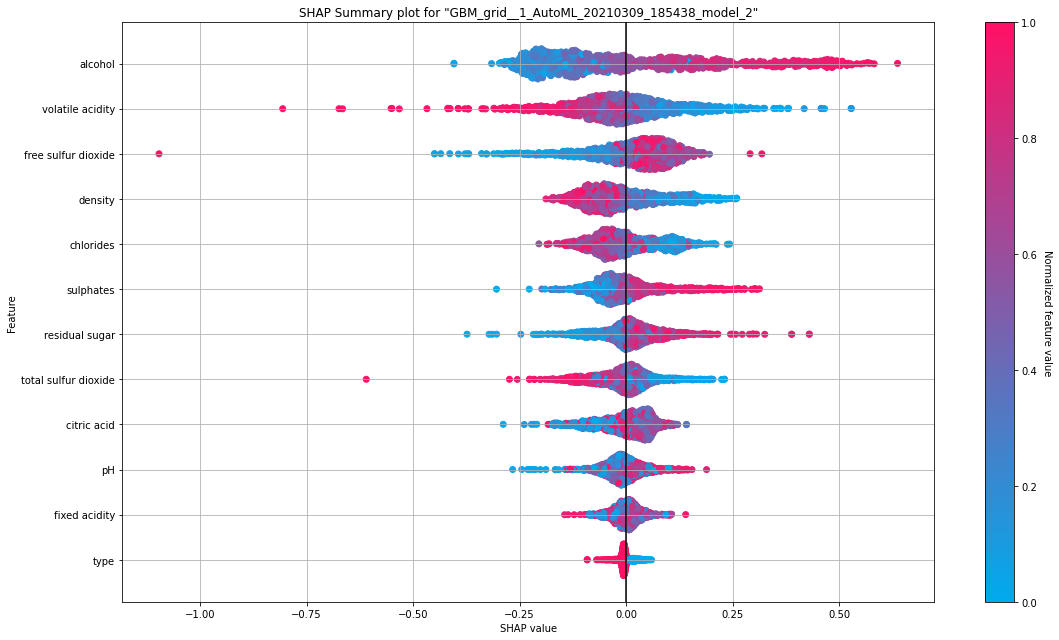

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

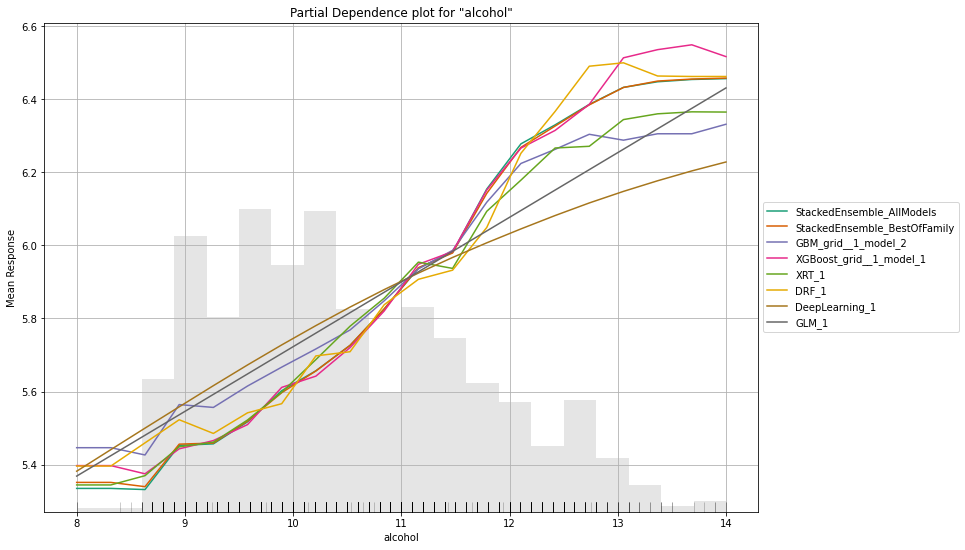

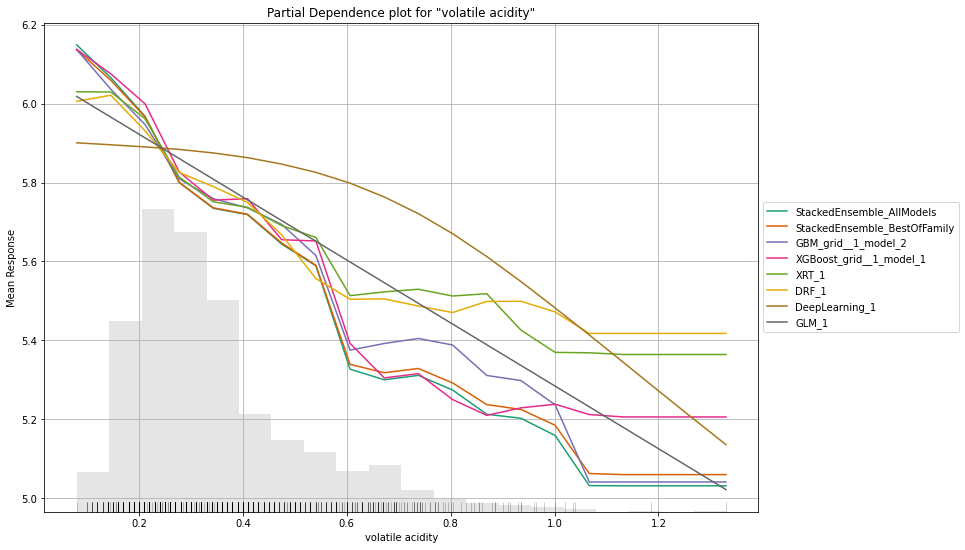

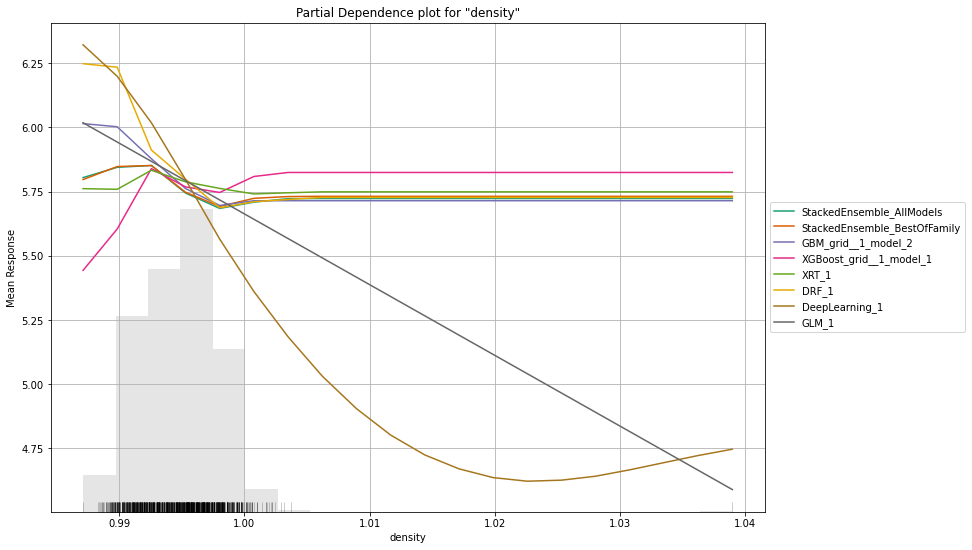

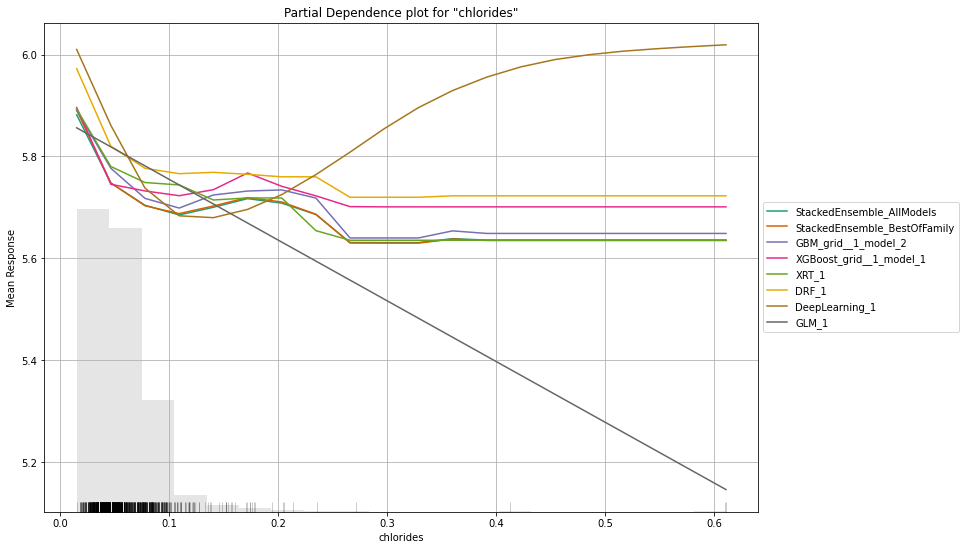

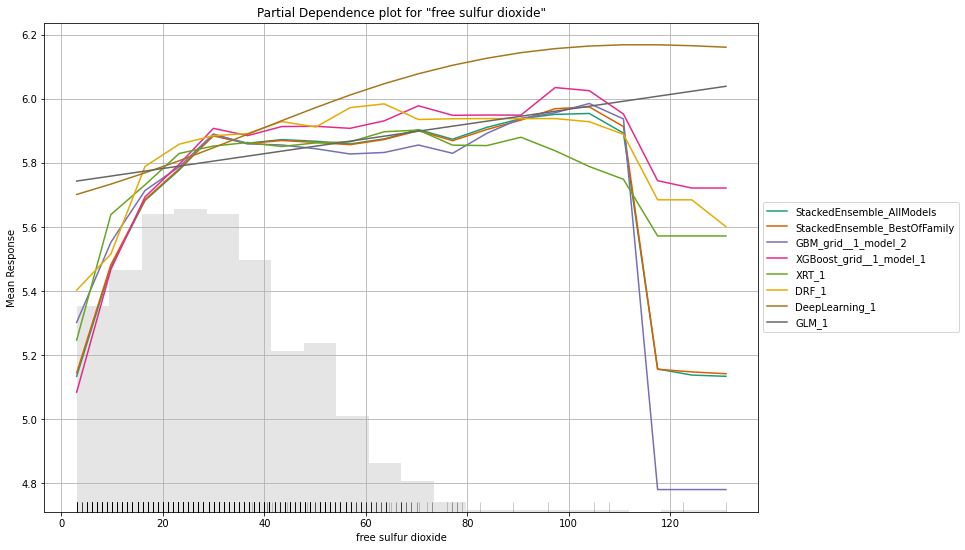

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

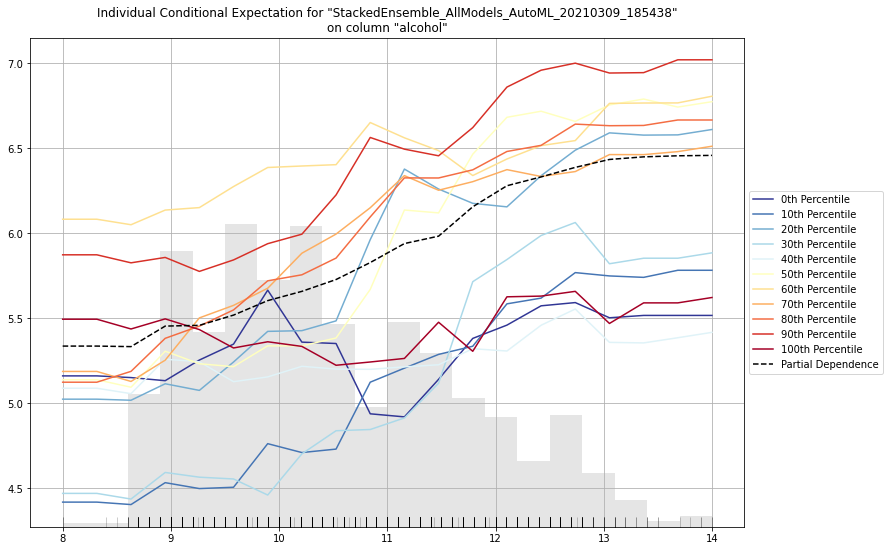

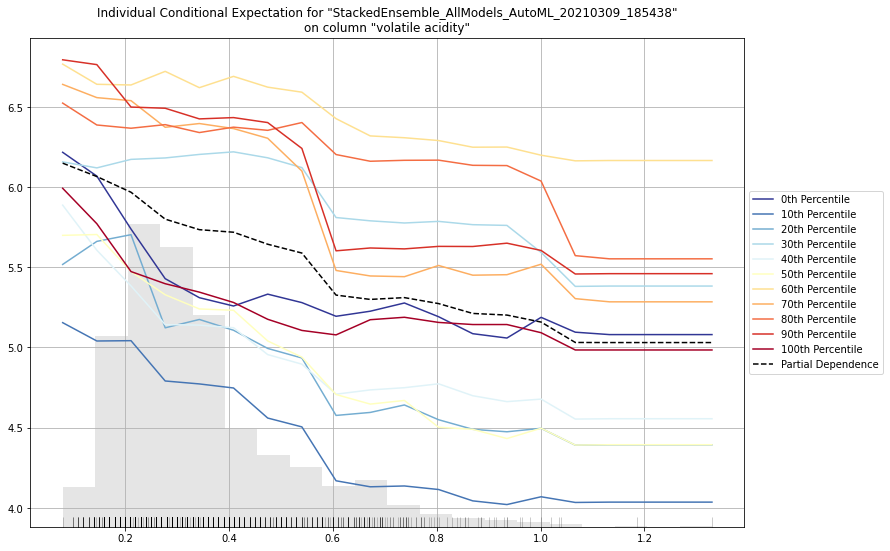

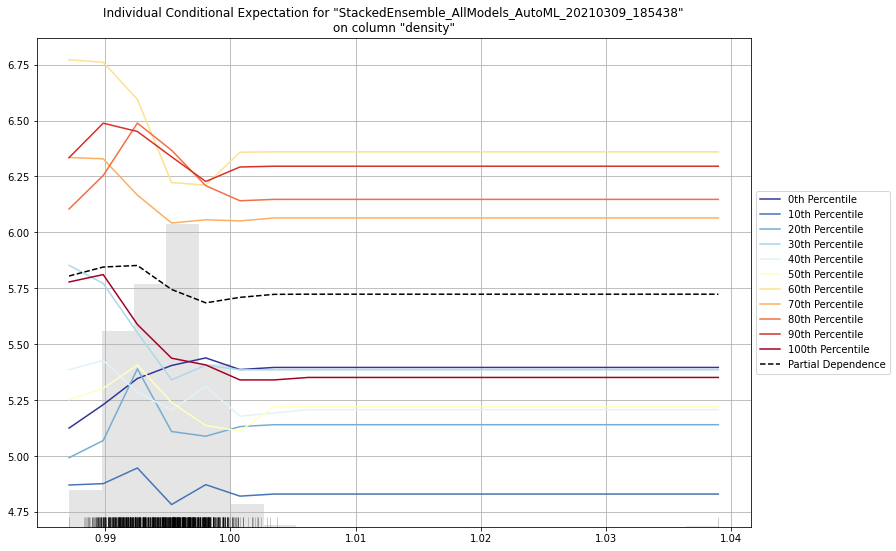

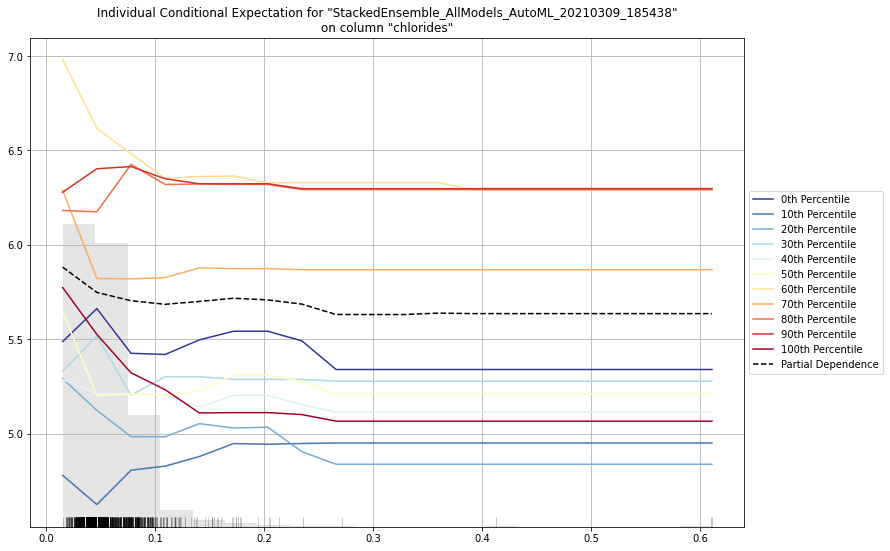

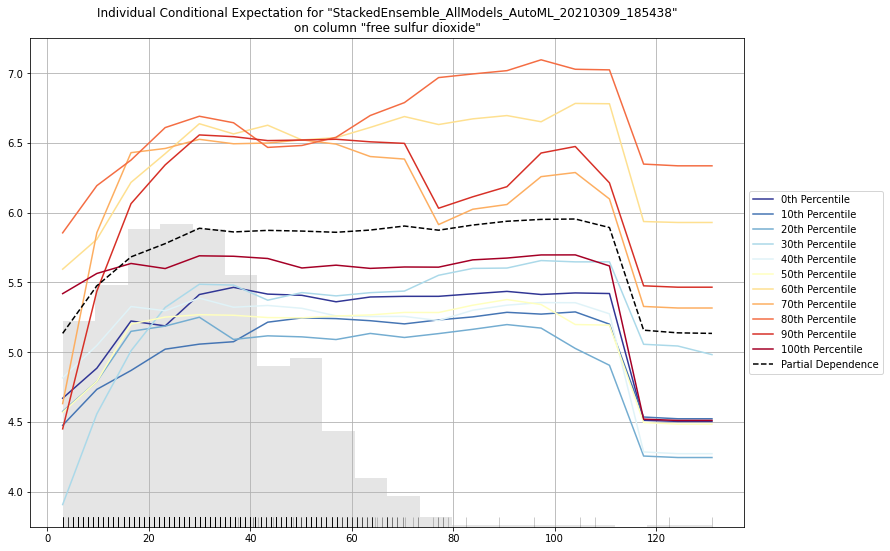

In [ ]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

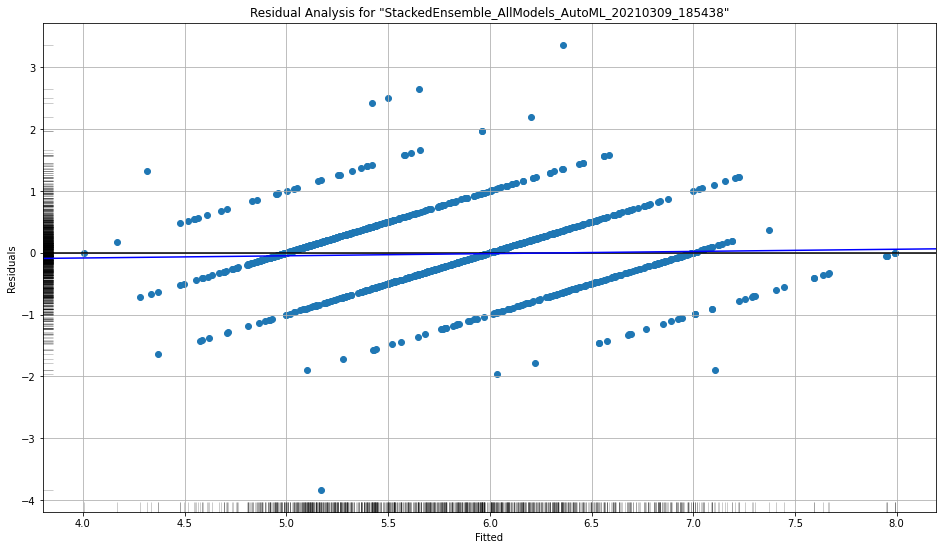

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

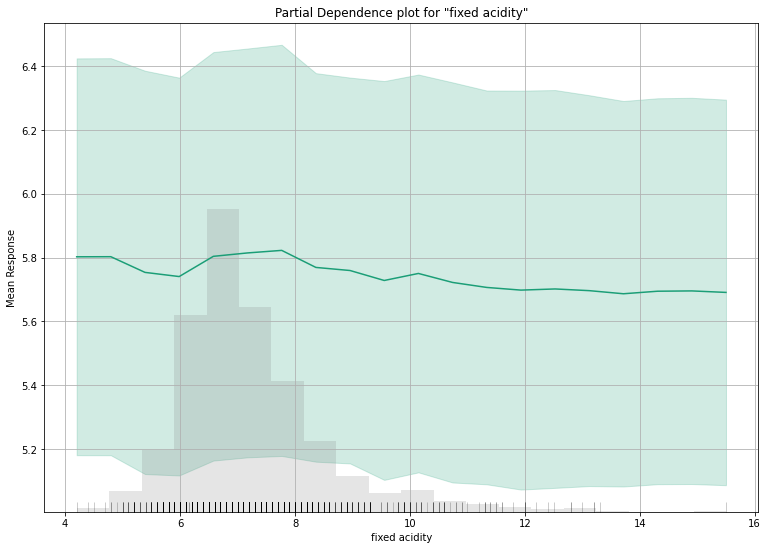

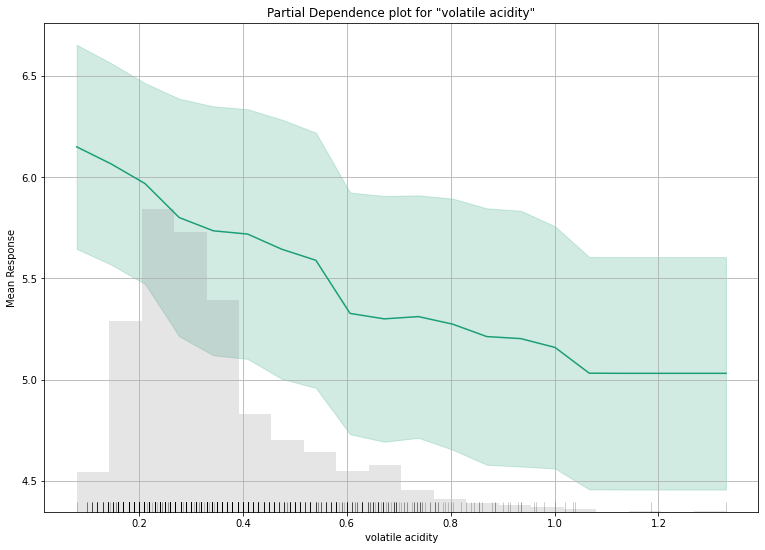

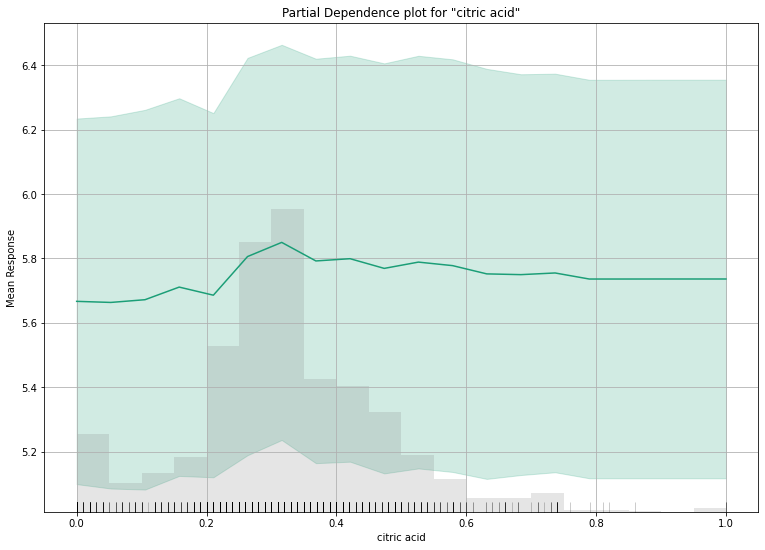

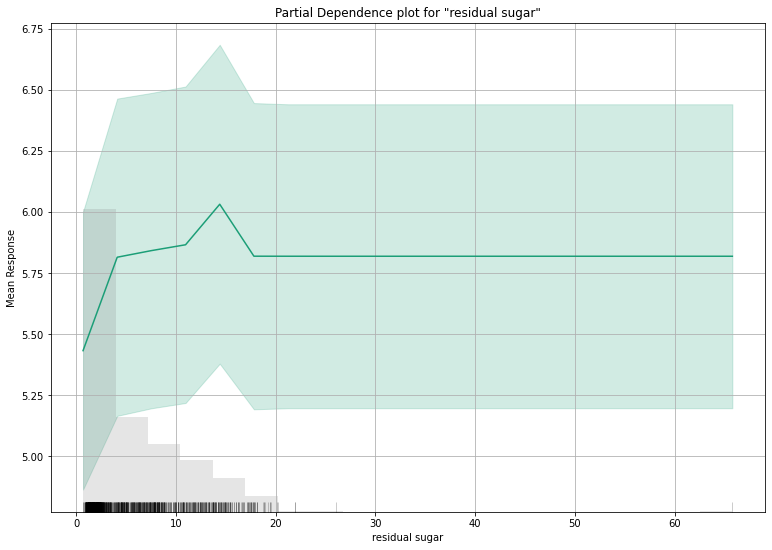

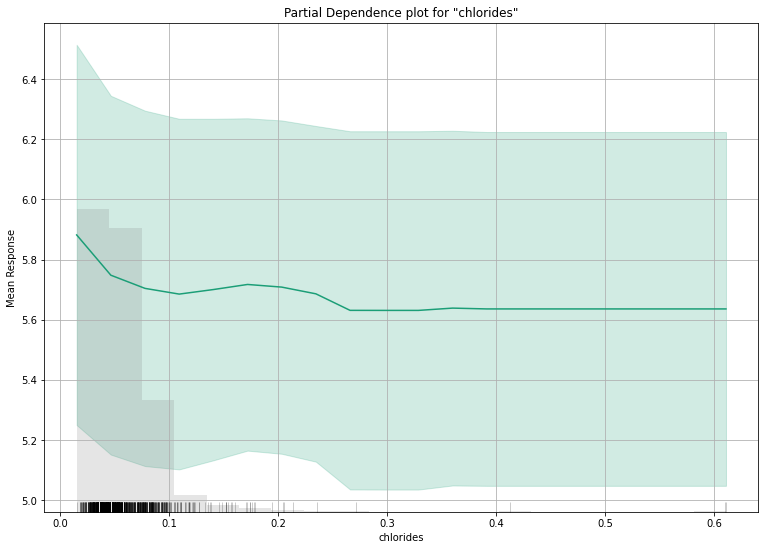

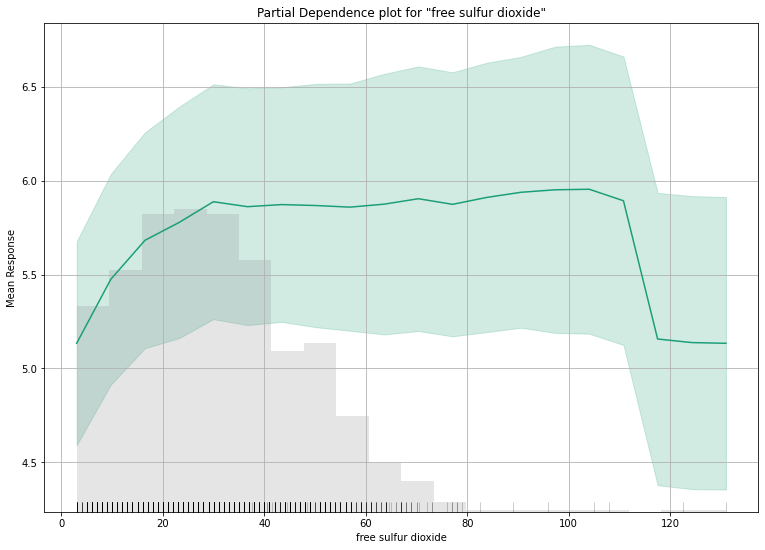

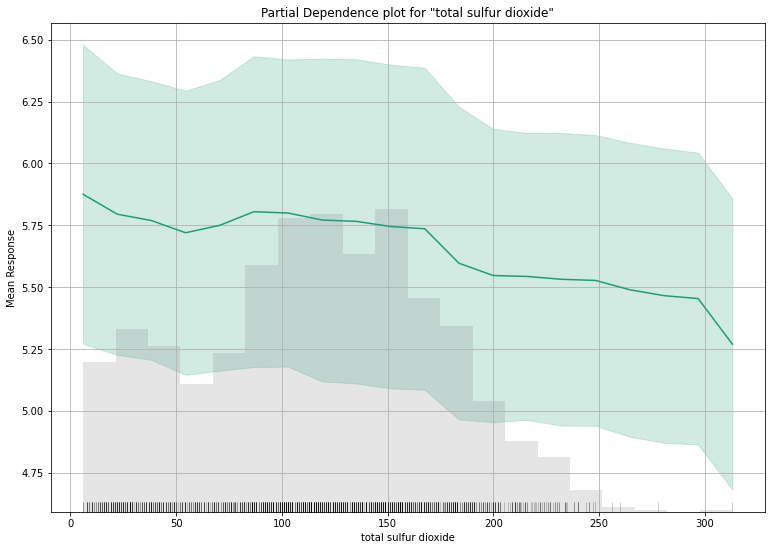

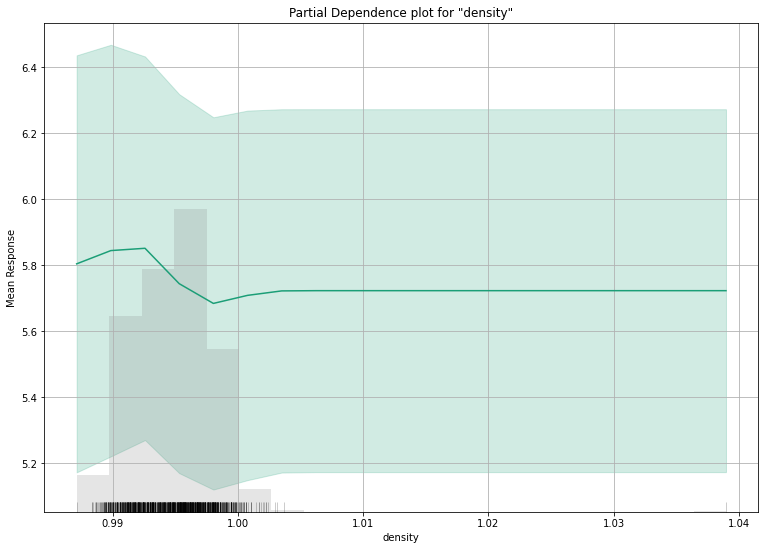

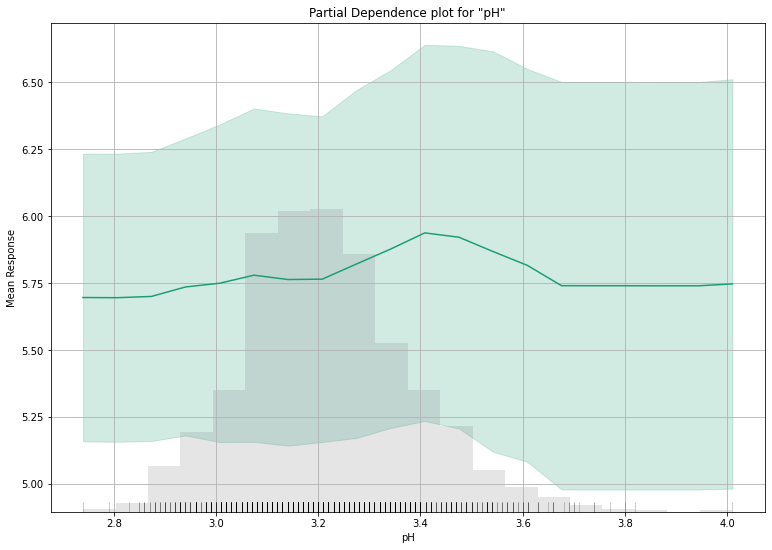

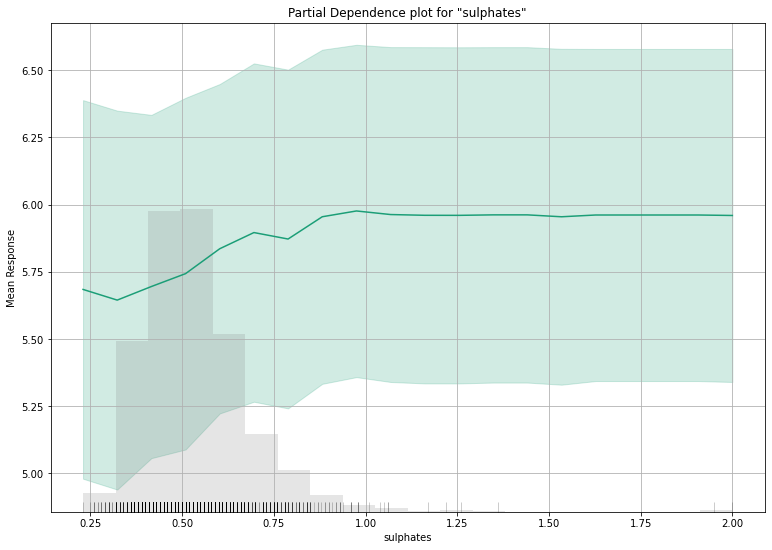

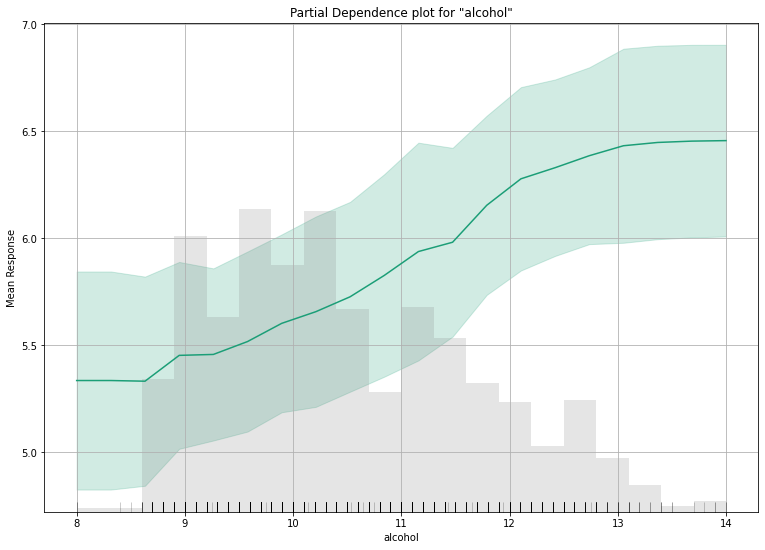

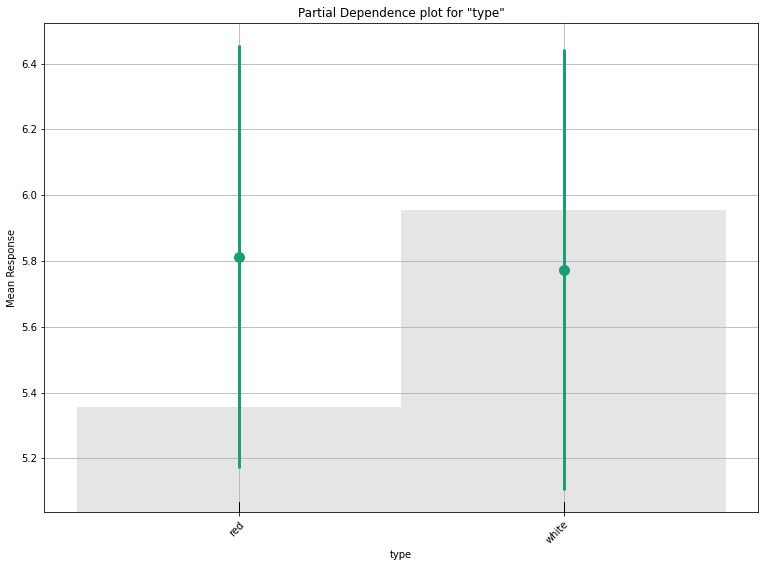

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

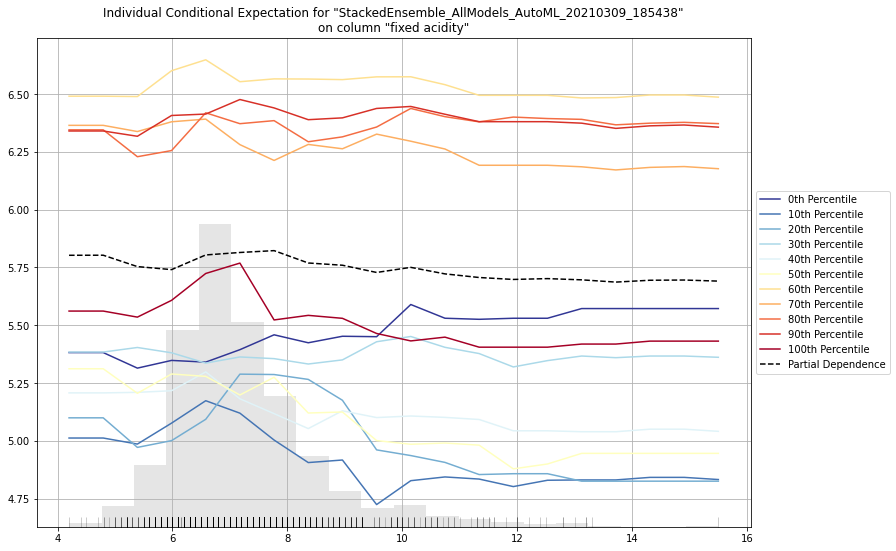

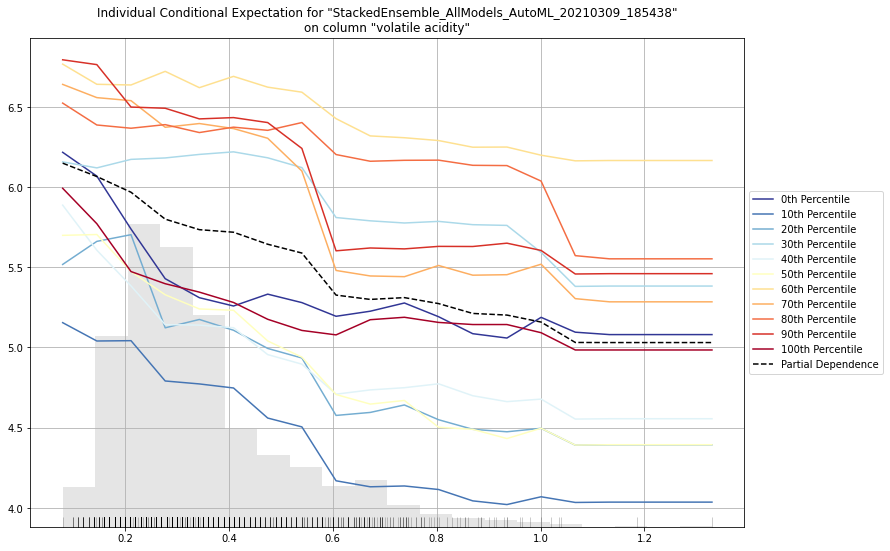

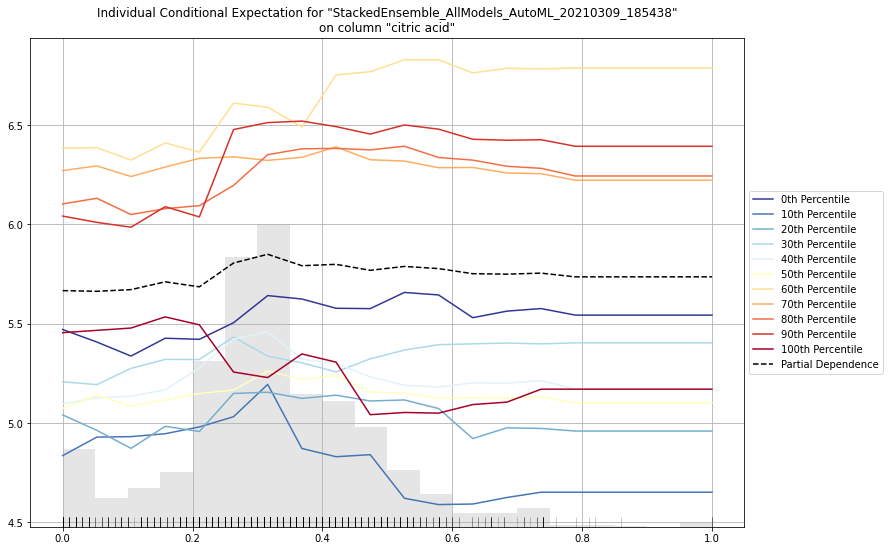

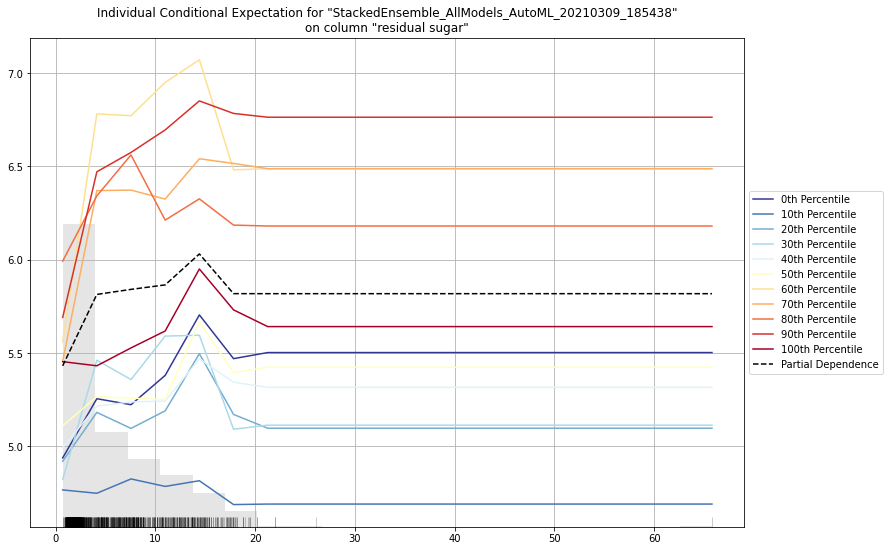

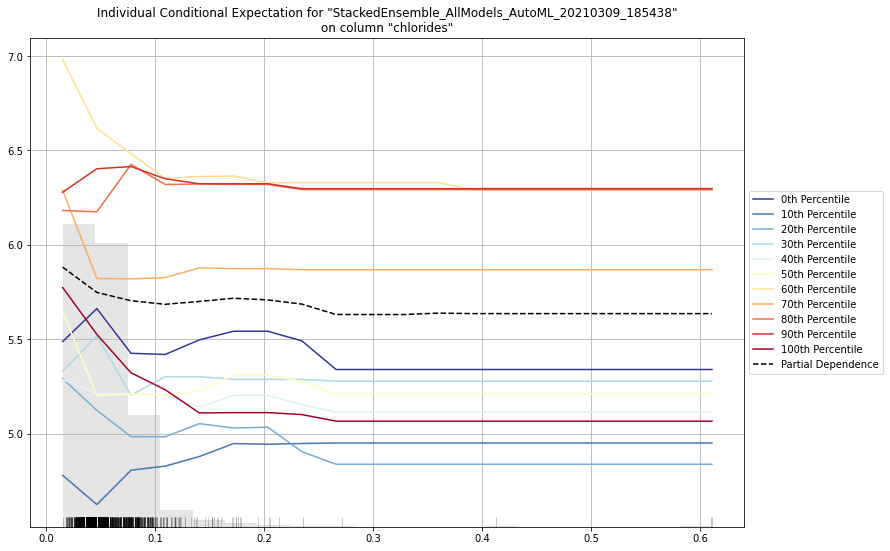

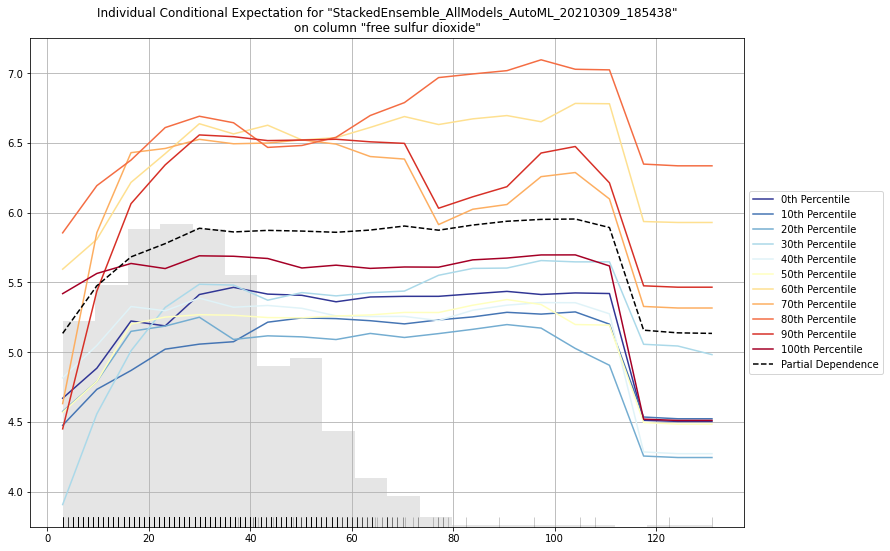

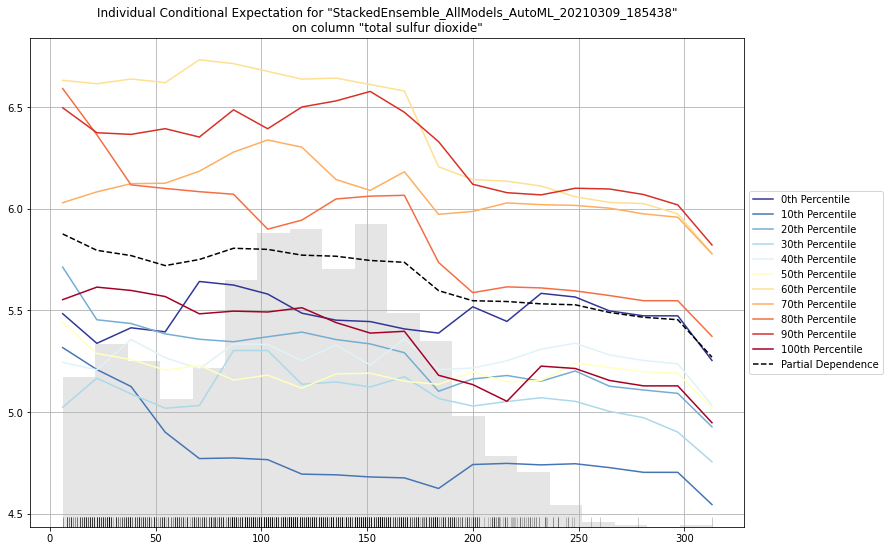

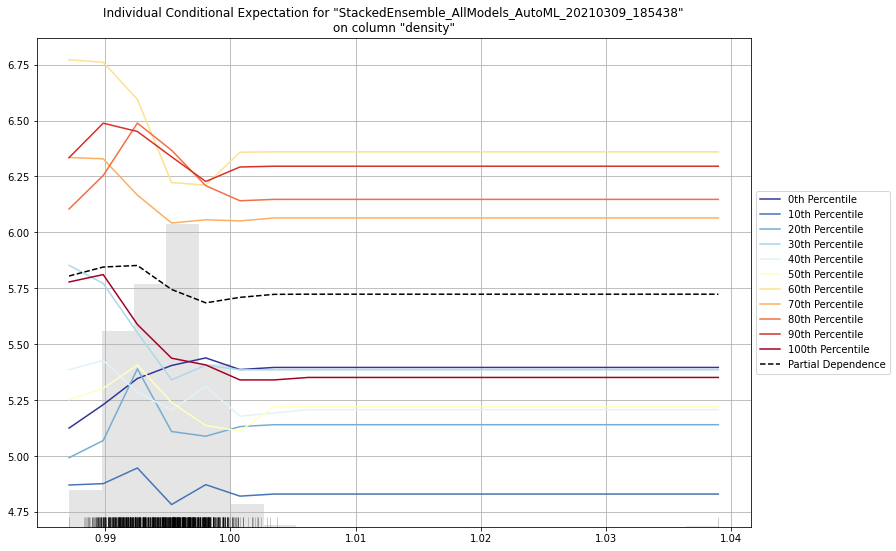

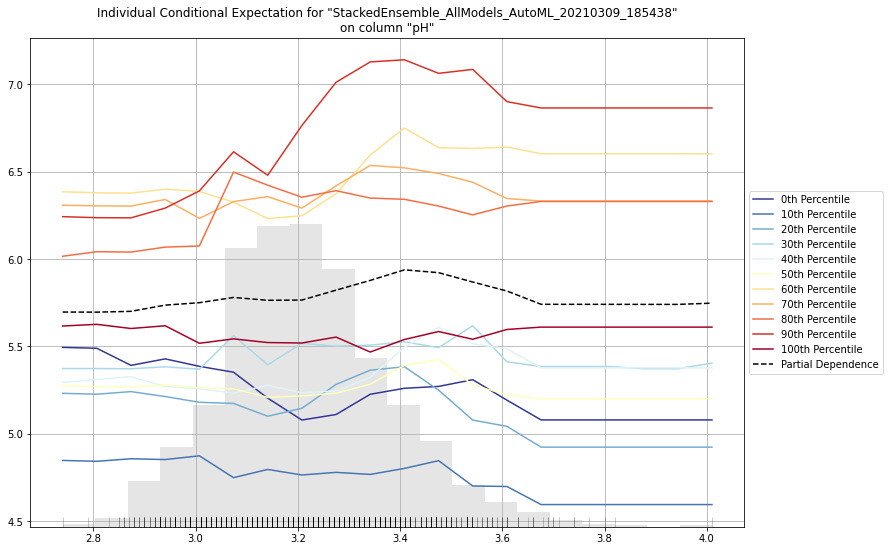

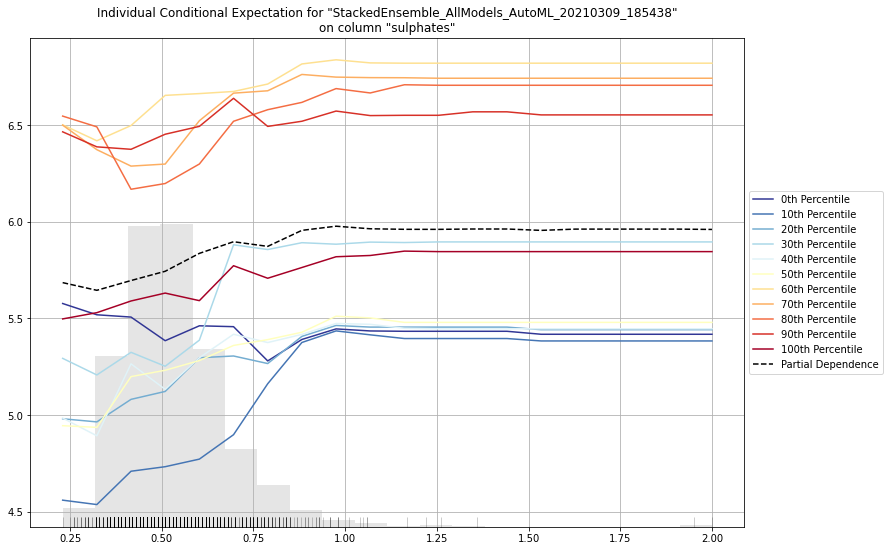

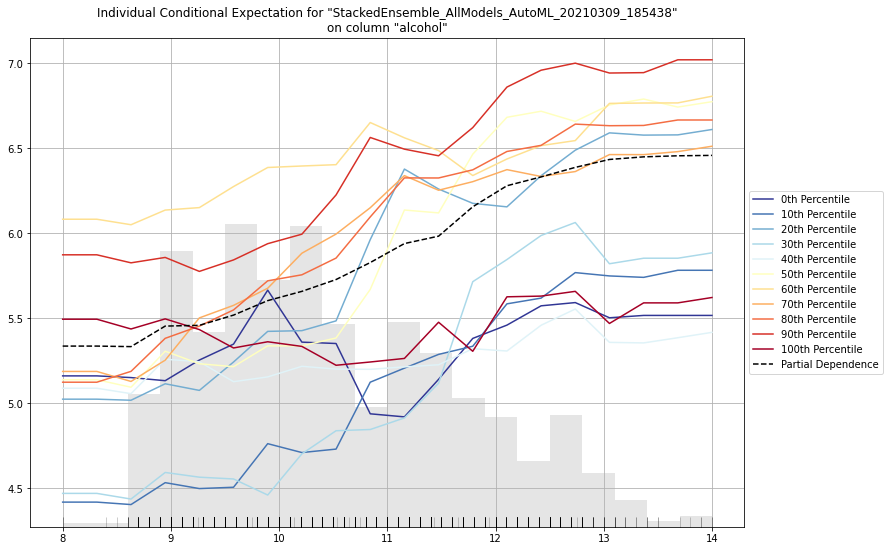

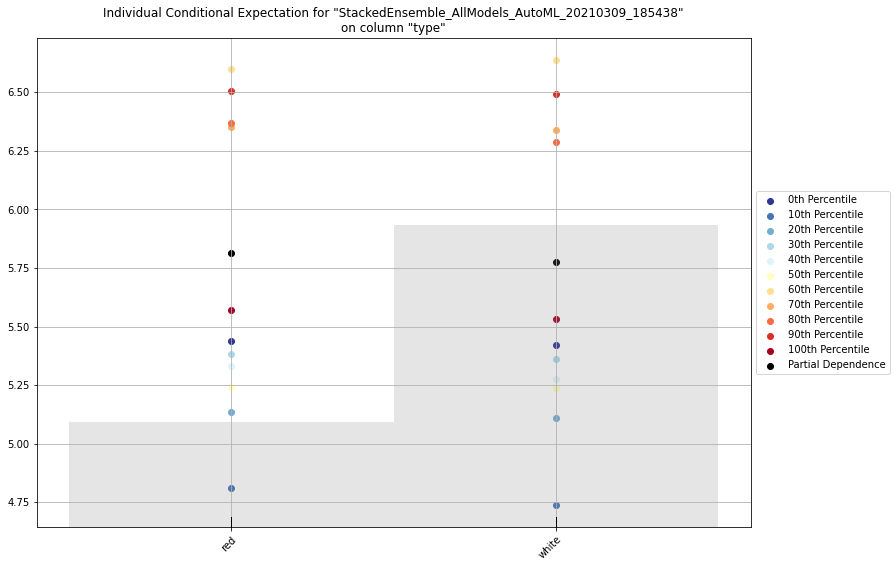

In [ ]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)